In [1]:
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
import pandas as pd
import datetime

In [2]:
date_str = datetime.datetime.now().strftime("%Y-%m-%d")

date_str = '2018-05-20'

print("Date: " + date_str)

Date: 2018-05-20


In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.7.0_75"; Java(TM) SE Runtime Environment (build 1.7.0_75-b13); Java HotSpot(TM) 64-Bit Server VM (build 24.75-b04, mixed mode)
  Starting server from /Users/taj/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/4p/wz6bkm9n4gv881hh50tvj8k80000gn/T/tmpw_5wcc79
  JVM stdout: /var/folders/4p/wz6bkm9n4gv881hh50tvj8k80000gn/T/tmpw_5wcc79/h2o_taj_started_from_python.out
  JVM stderr: /var/folders/4p/wz6bkm9n4gv881hh50tvj8k80000gn/T/tmpw_5wcc79/h2o_taj_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Australia/Sydney
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.8
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_taj_2tcspc
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [4]:

df_1 = pd.read_csv('/Users/taj/GitHub/scraping/stayz/WebData/nsw_fulldata/stayz_nsw_fulldata_' + date_str + '.csv')


# Drop Property_ID and Postcode and Extracted_At date, Reviews and Review_Count are duplicates drop one
# Drop the council ID, the postcode should be enough identifier

df_2 = df_1.drop(['property_id','postcode','ext_at','reviews','council_id'],axis=1)



df_3 = h2o.H2OFrame(df_2)
#df_3.summary()


df = df_3

#df_2[['review_count','review_value']].head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
# Change to test for buckets, not exact days
y = 'days_booked_bucket'

#y = 'total_booked_days'
x = df.col_names
x.remove(y)
print("Response = " + y)
print("Predictors = " + str(x))

Response = days_booked_bucket
Predictors = ['bathrooms', 'bedrooms', 'beds', 'description_wc', 'guests', 'init_price', 'syd_brg_deg', 'syd_dist_km', 'suburb_id', 'photos', 'review_count', 'review_value', 'f_air_conditioning', 'f_balcony', 'f_books', 'f_child_s_high_chair', 'f_children_welcome', 'f_coffee_maker', 'f_dining', 'f_dishes_and_utensils', 'f_dishwasher', 'f_games', 'f_garage', 'f_internet_access', 'f_iron_and_board', 'f_kitchen', 'f_lawn_garden', 'f_linens_provided', 'f_living_room', 'f_microwave', 'f_non_smoking', 'f_outdoor_grill', 'f_oven', 'f_parking', 'f_private_pool', 'f_refrigerator', 'f_satellite_cable', 'f_stove', 'f_toaster', 'f_towels_provided', 'f_washing_machine', 'f_clothes_dryer', 'f_deck_patio', 'f_dvd_player', 'f_hair_dryer', 'f_heating', 'f_hot_tub', 'f_pets_allowed', 'f_telephone', 'f_television', 'f_toys', 'f_wood_stove', 'f_stereo', 'f_tennis', 'f_video_library', 'f_fireplace', 'f_wheelchair_accessible', 'f_games_room', 'f_video_games', 'f_long_term_rente

In [6]:
# Now using buckets instead
#df['total_booked_days'] = df['total_booked_days'].asfactor()

df['days_booked_bucket'] = df['days_booked_bucket'].asfactor()

In [7]:
#df['total_booked_days'].levels()
#[['0', '1']]

In [8]:
train, valid, test = df.split_frame(ratios=[.8, .1])
print(df.shape)
print(train.shape)
print(valid.shape)
print(test.shape)

(14969, 76)
(12006, 76)
(1429, 76)
(1534, 76)


In [9]:
#from h2o.estimators.gbm import H2OGradientBoostingEstimator
#gbm = H2OGradientBoostingEstimator()
#gbm.train(x=x, y =y, training_frame=train, validation_frame=valid)

In [10]:
#gbm.confusion_matrix(valid)

In [11]:
#gbm.varimp_plot()

In [12]:
#gbm.varimp()

In [13]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

from h2o.estimators import H2OGradientBoostingEstimator 
drf = H2ORandomForestEstimator()
#drf = H2ODeepLearningEstimator()
#drf = H2OGradientBoostingEstimator()

drf.train(x=x, y = y, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
#drf.confusion_matrix()

In [15]:
drf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1526883944713_1


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.015250714723167582
RMSE: 0.12349378414789783
LogLoss: 0.29655930318353096
Mean Per-Class Error: 0.6365812433675698
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,Error,Rate
11814.0,2.0,0.0,0.0001693,"2 / 11,816"
171.0,17.0,0.0,0.9095745,171 / 188
2.0,0.0,0.0,1.0,2 / 2
11987.0,19.0,0.0,0.0145760,"175 / 12,006"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.985424
2,0.9925038
3,1.0



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.01750567094681856
RMSE: 0.132308997981311
LogLoss: 0.16558029307388286
Mean Per-Class Error: 0.26666666666666666
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,Error,Rate
1399.0,0.0,0.0,0.0,"0 / 1,399"
24.0,6.0,0.0,0.8,24 / 30
0.0,0.0,0.0,nan,0 / 0
1423.0,6.0,0.0,0.0167950,"24 / 1,429"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.983205
2,0.996501
3,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2018-05-21 16:25:52,0.084 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-05-21 16:25:53,1.220 sec,1.0,0.1752742,0.9326132,0.0144316,0.2018492,1.3373326,0.0195941
,2018-05-21 16:25:54,1.481 sec,2.0,0.1664326,0.8305272,0.0200526,0.1431882,0.5712931,0.0188943
,2018-05-21 16:25:54,1.773 sec,3.0,0.1655720,0.8082552,0.0178313,0.1390639,0.5261200,0.0181945
,2018-05-21 16:25:54,1.906 sec,4.0,0.1606598,0.7458532,0.0171491,0.1364401,0.4812279,0.0181945
---,---,---,---,---,---,---,---,---,---
,2018-05-21 16:25:56,3.807 sec,23.0,0.1285646,0.3961439,0.0148259,0.1326532,0.2720580,0.0167950
,2018-05-21 16:25:56,3.910 sec,24.0,0.1281305,0.3933071,0.0149092,0.1322967,0.2499848,0.0167950
,2018-05-21 16:25:56,4.013 sec,25.0,0.1275954,0.3775041,0.0148259,0.1322640,0.2493757,0.0167950
,2018-05-21 16:25:56,4.105 sec,26.0,0.1273472,0.3775368,0.0148259,0.1318948,0.2264509,0.0167950



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
page_pos,726.4334106,1.0,0.0647893
description_wc,629.1950684,0.8661428,0.0561168
photos,581.4664917,0.8004402,0.0518600
syd_dist_km,554.2108765,0.7629204,0.0494291
suburb_id,537.2740479,0.7396054,0.0479185
---,---,---,---
f_indoor_pool,14.4517689,0.0198941,0.0012889
f_video_games,11.3312101,0.0155984,0.0010106
f_eco_friendly,8.0684366,0.0111069,0.0007196
f_free_wifi,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()
variables = drf._model_json['output']['variable_importances']['variable'][0:10]
y_pos = np.arange(len(variables))
scaled_importance = drf._model_json['output']['variable_importances']['scaled_importance'][0:10]
ax.barh(y_pos, scaled_importance, align='center', color='lightblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
#ax.set_xlabel('Scaled Importance')
ax.set_title('Top 10 Most Important Features')
plt.show()

<Figure size 640x480 with 1 Axes>

In [17]:
drf._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,page_pos,726.433411,1.000000,0.064789
1,description_wc,629.195068,0.866143,0.056117
2,photos,581.466492,0.800440,0.051860
3,syd_dist_km,554.210876,0.762920,0.049429
4,suburb_id,537.274048,0.739605,0.047919
5,init_price,521.505859,0.717899,0.046512
6,review_count,515.947510,0.710247,0.046016
7,review_value,427.227509,0.588117,0.038104
8,guests,399.979797,0.550608,0.035673
9,beds,385.061737,0.530072,0.034343


In [18]:
# Model performance
performance = drf.model_performance(test_data=test)

drf.model_performance(test_data=test)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.012080183158168894
RMSE: 0.10990988653514702
LogLoss: 0.18350761999199158
Mean Per-Class Error: 0.3157894736842105
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,Error,Rate
1515.0,0.0,0.0,0.0,"0 / 1,515"
18.0,1.0,0.0,0.9473684,18 / 19
0.0,0.0,0.0,nan,0 / 0
1533.0,1.0,0.0,0.0117340,"18 / 1,534"


Top-3 Hit Ratios: 


k,hit_ratio
1,0.988266
2,0.9960887
3,1.0


In [19]:
print(type(drf.confusion_matrix(test).as_data_frame()))

conf_matr = drf.confusion_matrix(test).as_data_frame()


conf_matr.to_csv('/Users/taj/GitHub/scraping/stayz/WebData/nsw_fulldata/stayz_nsw_confmatr_' + date_str + '.csv')

<class 'pandas.core.frame.DataFrame'>


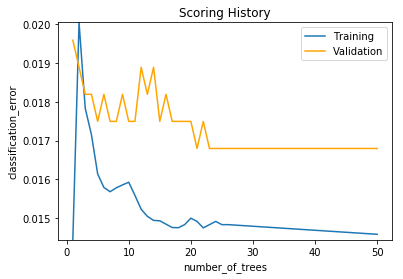

In [20]:
drf.plot(server=False)

In [21]:
h2o.cluster().shutdown(prompt=False)

H2O session _sid_80a2 closed.
